# Kmeans clustering :

## Some imports

In [103]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Loading Data Set 

In [104]:
crimeDataset = pd.read_csv("/content/crime.csv")
crimeDataset_orig = crimeDataset.copy()
print(crimeDataset.head())

      DOB     DOC  AGE  gender  Place  nationality  TOC  EDU  \
0  Jul-93  16-Oct   23       1      0            1    0    2   
1  Oct-88  18-Jun   30       1      0            2    0    1   
2  Oct-85  15-Nov   30       1      0            3    0    0   
3  Jul-91  15-Sep   24       1      0            4    0    0   
4  Aug-92  15-Aug   23       1      0            5    0    0   

   Residence Status  status  marital status  
0                 0       1               0  
1                 0       0               0  
2                 0       1               2  
3                 0       0               0  
4                 1       0               1  


In [105]:
# Let's drop some unecessary columns
crimeDataset.drop(crimeDataset.columns[[0, 1]], 1, inplace=True)
print(crimeDataset.head())

   AGE  gender  Place  nationality  TOC  EDU  Residence Status  status  \
0   23       1      0            1    0    2                 0       1   
1   30       1      0            2    0    1                 0       0   
2   30       1      0            3    0    0                 0       1   
3   24       1      0            4    0    0                 0       0   
4   23       1      0            5    0    0                 1       0   

   marital status  
0               0  
1               0  
2               2  
3               0  
4               1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [106]:
# for later used for 2 variables plot for K-Means
df = crimeDataset[['TOC', 'nationality']]
df.head()

,TOC,nationality
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


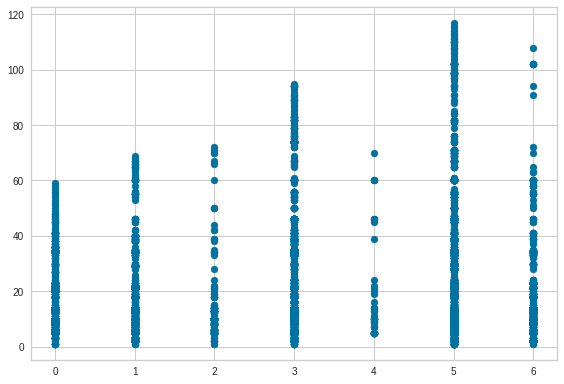

In [107]:
plt.scatter(df['TOC'], df['nationality'])

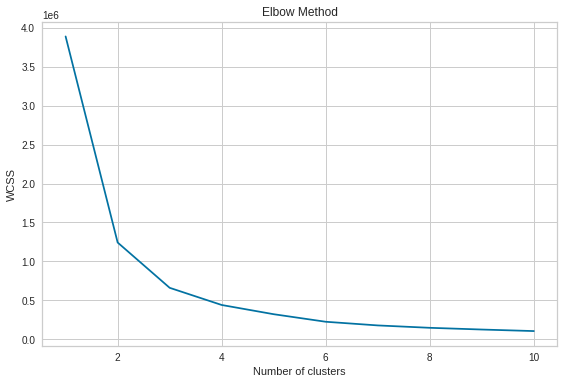

In [108]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

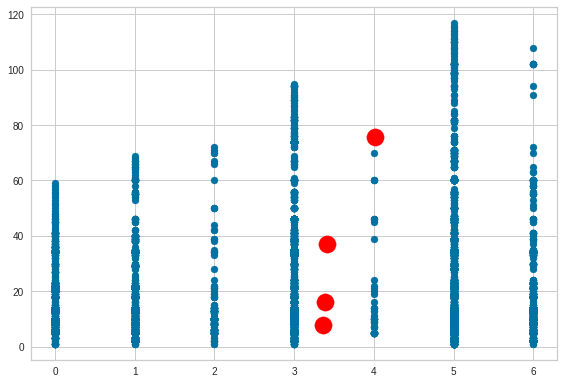

In [109]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['TOC'], df['nationality'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [110]:
print(pred_y)

[3 3 3 ... 3 3 3]


In [111]:
print(kmeans.cluster_centers_)

[[ 3.39259928 16.04963899]
 [ 3.41168416 37.02601552]
 [ 4.01982379 75.86343612]
 [ 3.36378915  7.61802903]]


In [112]:
print(kmeans.labels_)


[3 3 3 ... 3 3 3]


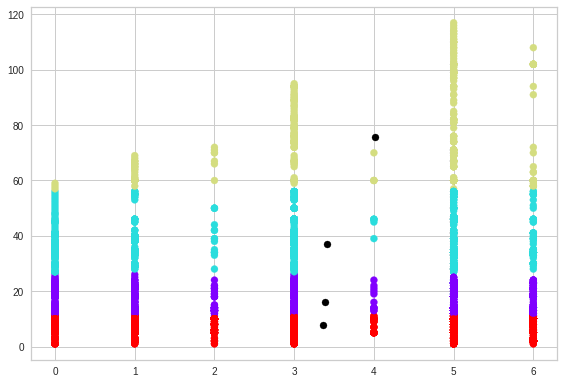

In [113]:
plt.scatter(df['TOC'],df['nationality'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [114]:
df['cluster'] = pred_y
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TOC,nationality,cluster
0,0,1,3
1,0,2,3
2,0,3,3
3,0,4,3
4,0,5,3


No handles with labels found to put in legend.


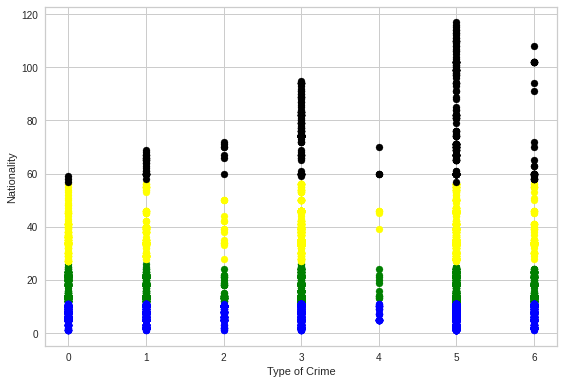

In [115]:
df1 =df[df.cluster == 0]
df2 =df[df.cluster == 1]
df3 =df[df.cluster == 2]
df4 =df[df.cluster == 3]
plt.scatter(df1['TOC'],df1['nationality'], color = 'green')
plt.scatter(df2['TOC'],df2['nationality'], color = 'yellow')
plt.scatter(df3['TOC'],df3['nationality'], color = 'black')
plt.scatter(df4['TOC'],df4['nationality'], color = 'blue')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.legend()

In [116]:
"""# issue is due to scaling issue thats why we have to scale our algorithm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['nationality']])
df['nationality'] = scaler.transform(df[['nationality']])

scaler.fit(df[['TOC']])
df['TOC'] = scaler.transform(df[['TOC']])"""

"# issue is due to scaling issue thats why we have to scale our algorithm\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\nscaler.fit(df[['nationality']])\ndf['nationality'] = scaler.transform(df[['nationality']])\n\nscaler.fit(df[['TOC']])\ndf['TOC'] = scaler.transform(df[['TOC']])"

In [117]:
df.head()

,TOC,nationality,cluster
0,0,1,3
1,0,2,3
2,0,3,3
3,0,4,3
4,0,5,3


In [118]:
df.tail()

,TOC,nationality,cluster
20162,6,5,3
20163,6,14,0
20164,6,5,3
20165,6,5,3
20166,6,5,3


In [119]:
#to save file into csv
df.to_csv("Cluster.csv")

In [120]:
kmeans.cluster_centers_

array([[ 3.39259928, 16.04963899],
       [ 3.41168416, 37.02601552],
       [ 4.01982379, 75.86343612],
       [ 3.36378915,  7.61802903]])

In [121]:
df1

,TOC,nationality,cluster
23,0,12,0
24,0,13,0
26,0,14,0
30,0,15,0
32,0,16,0
...,...,...,...
20139,6,14,0
20147,6,18,0
20151,6,12,0
20156,6,21,0


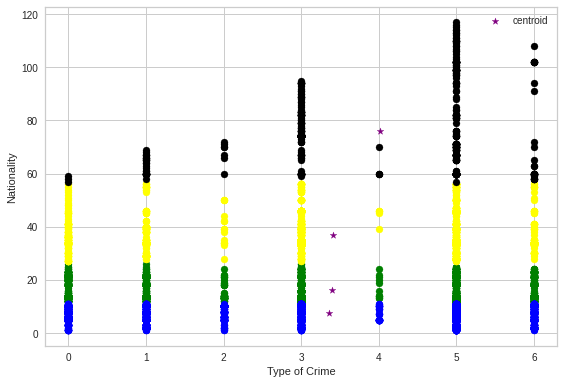

In [122]:
df1 =df[df.cluster == 0]
df2 =df[df.cluster == 1]
df3 =df[df.cluster == 2]
df4 =df[df.cluster == 3]
plt.scatter(df1.TOC,df1['nationality'], color = 'green')
plt.scatter(df2.TOC,df2['nationality'], color = 'yellow')
plt.scatter(df3.TOC,df3['nationality'], color = 'black')
plt.scatter(df4.TOC,df4['nationality'], color = 'blue')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

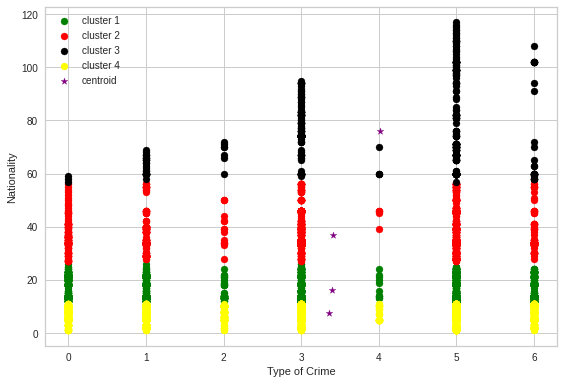

In [129]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.TOC,df1[['nationality']],color='green', label = 'cluster 1')
plt.scatter(df2.TOC,df2[['nationality']],color='red', label = 'cluster 2')
plt.scatter(df3.TOC,df3[['nationality']],color='black', label = 'cluster 3')
plt.scatter(df4.TOC,df4[['nationality']],color='yellow', label = 'cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Type of Crime')
plt.ylabel('Nationality')
plt.legend()

In [124]:
from IPython.display import display, HTML
from pdb import set_trace
from sklearn.tree import _tree, DecisionTreeClassifier

In [125]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [128]:
cluster_report(df, pred_y, min_samples_leaf=50, pruning_level=0.05)

,class_name,instance_count,rule_list
1,0,4432,[1.0] (nationality > 11.5) and (nationality <= 26.5)
2,1,2191,[0.8283553875236295] (nationality > 11.5) and (nationality > 26.5)
3,2,454,NaN
0,3,13090,[1.0] (nationality <= 11.5)


In [131]:
# To calculate the score 
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(df, pred_y)
print(db_index)

0.6150092883722962


In [135]:
# to calculate sihouette
from sklearn.metrics import silhouette_score
score = silhouette_score(df, pred_y, metric='euclidean')
print(score)

0.5234051909990816
